# Try to remove doublet from macaque scRNA-seq data using scrublet

In [1]:
%matplotlib inline
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42

In [3]:
os.chdir('/data/User/sunym/project/Brain/')
os.getcwd()

'/data/User/sunym/project/Brain'

## A68A

### read data

In [4]:
A68A_RNA = pd.read_csv('./processed_data/A68A_RNA_raw_counts_210613.csv')
A68A_RNA = A68A_RNA.drop(columns=['Unnamed: 0'])
A68A_RNA = A68A_RNA.T
A68A_RNA

,0,1,2,3,4,5,6,7,8,9,...,35422,35423,35424,35425,35426,35427,35428,35429,35430,35431
AAACCCAAGACCTCAT.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCAAGACCTCCG.1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCAAGCCTGAGA.1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCAAGGTAGCCA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCAAGGTTGGTG.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTGGTGATG.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGGTTATCTTC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGTCAGGTAAA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGTCGCGGTAC.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
A68A_cell_list = A68A_RNA.index
A68A_cell_list

Index(['AAACCCAAGACCTCAT.1', 'AAACCCAAGACCTCCG.1', 'AAACCCAAGCCTGAGA.1',
       'AAACCCAAGGTAGCCA.1', 'AAACCCAAGGTTGGTG.1', 'AAACCCACAACACTAC.1',
       'AAACCCACAATTGGTC.1', 'AAACCCACACCCTAGG.1', 'AAACCCACAGACCTGC.1',
       'AAACCCACATCCGGTG.1',
       ...
       'TTTGTTGCAGGCACAA.1', 'TTTGTTGCAGTGCGCT.1', 'TTTGTTGCATAGCACT.1',
       'TTTGTTGCATCGAACT.1', 'TTTGTTGGTCGCGGTT.1', 'TTTGTTGGTGGTGATG.1',
       'TTTGTTGGTTATCTTC.1', 'TTTGTTGTCAGGTAAA.1', 'TTTGTTGTCGCGGTAC.1',
       'TTTGTTGTCGGCTTGG.1'],
      dtype='object', length=12479)

In [6]:
A68A_RNA = A68A_RNA.values

### scrublet

In [7]:
scrub = scr.Scrublet(A68A_RNA, expected_doublet_rate=0.06)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.15
Detected doublet rate = 11.7%
Estimated detectable doublet fraction = 64.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 18.2%
Elapsed time: 16.3 seconds


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

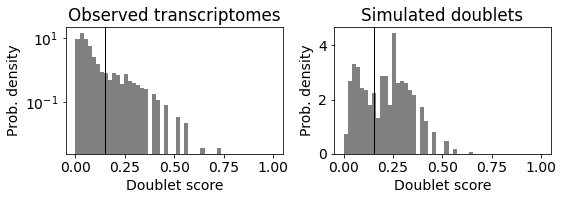

In [8]:
scrub.plot_histogram()

Running UMAP...
Done.


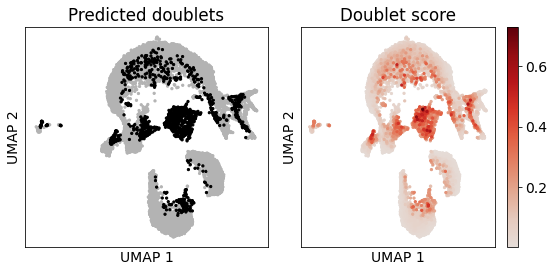

In [9]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

scrub.plot_embedding('UMAP', order_points=True);

# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);

In [10]:
a= np.array([A68A_cell_list,doublet_scores,predicted_doublets])
a = pd.DataFrame({'barcodes':a[0,:],'score':a[1,:],'prediction':a[2,:]})
a.to_csv('./res/step_1_fig_210612/A68A_scrublet_210613.txt', index=False,header=True)

## A68B

### read data

In [11]:
A68B_RNA = pd.read_csv('./processed_data/A68B_RNA_raw_counts_210613.csv')
A68B_RNA = A68B_RNA.drop(columns=['Unnamed: 0'])
A68B_RNA = A68B_RNA.T
A68B_RNA

,0,1,2,3,4,5,6,7,8,9,...,35422,35423,35424,35425,35426,35427,35428,35429,35430,35431
AAACCCAAGAAGGATG.1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCAAGTACGAGC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCAAGTGGTTGG.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCACACTCCTGT.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCATCAAAGGTA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTTGGGACA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGGTTTGTTCT.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGTCCACCTGT.1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGTCCGTGTCT.1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
A68B_cell_list = A68B_RNA.index
A68B_cell_list

Index(['AAACCCAAGAAGGATG.1', 'AAACCCAAGTACGAGC.1', 'AAACCCAAGTGGTTGG.1',
       'AAACCCACACTCCTGT.1', 'AAACCCATCAAAGGTA.1', 'AAACCCATCCTGCTAC.1',
       'AAACCCATCCTTATGT.1', 'AAACCCATCTTAGGAC.1', 'AAACGAAAGATAACGT.1',
       'AAACGAAAGCATCCCG.1',
       ...
       'TTTGTTGAGTTGGACG.1', 'TTTGTTGCATCCGCGA.1', 'TTTGTTGGTACTTCCC.1',
       'TTTGTTGGTCACTTCC.1', 'TTTGTTGGTTCGGACC.1', 'TTTGTTGGTTGGGACA.1',
       'TTTGTTGGTTTGTTCT.1', 'TTTGTTGTCCACCTGT.1', 'TTTGTTGTCCGTGTCT.1',
       'TTTGTTGTCGTGGCTG.1'],
      dtype='object', length=8718)

In [13]:
A68B_RNA = A68B_RNA.values

### scrublet

In [14]:
scrub = scr.Scrublet(A68B_RNA, expected_doublet_rate=0.06)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.19
Detected doublet rate = 7.3%
Estimated detectable doublet fraction = 49.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 14.8%
Elapsed time: 10.3 seconds


(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

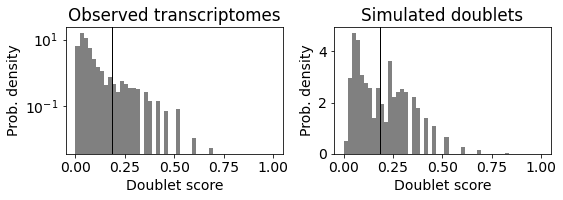

In [15]:
scrub.plot_histogram()

Running UMAP...
Done.


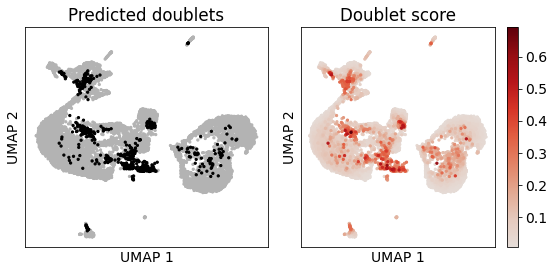

In [16]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

scrub.plot_embedding('UMAP', order_points=True);

# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);

In [17]:
a= np.array([A68B_cell_list,doublet_scores,predicted_doublets])
a = pd.DataFrame({'barcodes':a[0,:],'score':a[1,:],'prediction':a[2,:]})
a.to_csv('./res/step_1_fig_210612/A68B_scrublet_210613.txt', index=False,header=True)

## A84B

### read data

In [18]:
A84B_RNA = pd.read_csv('./processed_data/A84B_RNA_raw_counts_210613.csv')
A84B_RNA = A84B_RNA.drop(columns=['Unnamed: 0'])
A84B_RNA = A84B_RNA.T
A84B_RNA

,0,1,2,3,4,5,6,7,8,9,...,35422,35423,35424,35425,35426,35427,35428,35429,35430,35431
AAACCCACAATCTGCA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCACAATTCTCT.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCACAGGTTTAC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCAGTTAAGCAA.1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCATCAGCTTGA.1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGCGTGTCC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGAGTCCCTAA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGGTACTTCCC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGGTCTCTCTG.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
A84B_cell_list = A84B_RNA.index
A84B_cell_list

Index(['AAACCCACAATCTGCA.1', 'AAACCCACAATTCTCT.1', 'AAACCCACAGGTTTAC.1',
       'AAACCCAGTTAAGCAA.1', 'AAACCCATCAGCTTGA.1', 'AAACGAAAGGAAAGGT.1',
       'AAACGAACAACGTAAA.1', 'AAACGAACAAGCTGTT.1', 'AAACGAACAATGTCTG.1',
       'AAACGAACATGGGTTT.1',
       ...
       'TTTGGTTCAGGTTTAC.1', 'TTTGGTTGTACAACGG.1', 'TTTGGTTGTCCAGTTA.1',
       'TTTGGTTGTGGCTAGA.1', 'TTTGGTTTCTACGCAA.1', 'TTTGTTGAGCGTGTCC.1',
       'TTTGTTGAGTCCCTAA.1', 'TTTGTTGGTACTTCCC.1', 'TTTGTTGGTCTCTCTG.1',
       'TTTGTTGTCAACCTCC.1'],
      dtype='object', length=5970)

In [20]:
A84B_RNA = A84B_RNA.values

### scrublet

In [21]:
scrub = scr.Scrublet(A84B_RNA, expected_doublet_rate=0.06)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.53
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.8%
Elapsed time: 6.6 seconds


(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

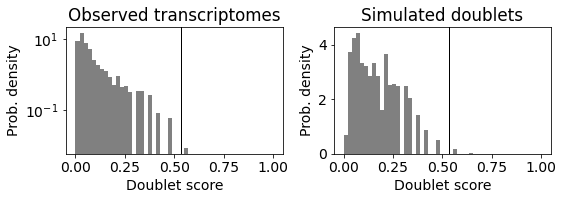

In [22]:
scrub.plot_histogram()

Running UMAP...
Done.


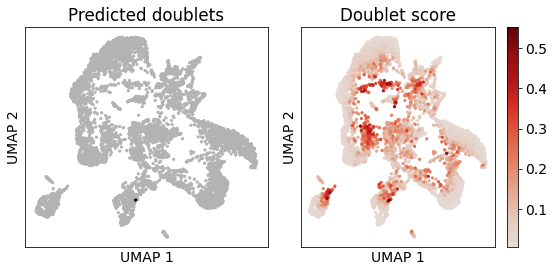

In [23]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

scrub.plot_embedding('UMAP', order_points=True);

# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);

In [24]:
a= np.array([A84B_cell_list,doublet_scores,predicted_doublets])
a = pd.DataFrame({'barcodes':a[0,:],'score':a[1,:],'prediction':a[2,:]})
a.to_csv('./res/step_1_fig_210612/A84B_scrublet_210613.txt', index=False,header=True)

## A84C

### read data

In [25]:
A84C_RNA = pd.read_csv('./processed_data/A84C_RNA_raw_counts_210613.csv')
A84C_RNA = A84C_RNA.drop(columns=['Unnamed: 0'])
A84C_RNA = A84C_RNA.T
A84C_RNA

,0,1,2,3,4,5,6,7,8,9,...,35422,35423,35424,35425,35426,35427,35428,35429,35430,35431
AAACCCAAGATCGACG.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCAAGCCTGTGC.1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCACAAGACGGT.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCAGTGTCATCA.1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCATCCACGTCT.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCCAAGCTA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGCACAATGTC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGCACCAGGTC.1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGCAGCCTACG.1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
A84C_cell_list = A84C_RNA.index
A84C_cell_list

Index(['AAACCCAAGATCGACG.1', 'AAACCCAAGCCTGTGC.1', 'AAACCCACAAGACGGT.1',
       'AAACCCAGTGTCATCA.1', 'AAACCCATCCACGTCT.1', 'AAACGAAAGACTCCGC.1',
       'AAACGAACAGAGGTTG.1', 'AAACGAAGTACAACGG.1', 'AAACGAAGTCCACACG.1',
       'AAACGAAGTGCGGCTT.1',
       ...
       'TTTGGAGCATTCTCCG.1', 'TTTGGAGGTCTCACGG.1', 'TTTGGAGTCTCGTCAC.1',
       'TTTGGAGTCTTTGCAT.1', 'TTTGGTTGTAGAAACT.1', 'TTTGGTTTCCAAGCTA.1',
       'TTTGTTGCACAATGTC.1', 'TTTGTTGCACCAGGTC.1', 'TTTGTTGCAGCCTACG.1',
       'TTTGTTGGTAATGATG.1'],
      dtype='object', length=5113)

In [27]:
A84C_RNA = A84C_RNA.values

### scrublet

In [28]:
scrub = scr.Scrublet(A84C_RNA, expected_doublet_rate=0.06)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 1.9%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.2%
Elapsed time: 5.9 seconds


(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

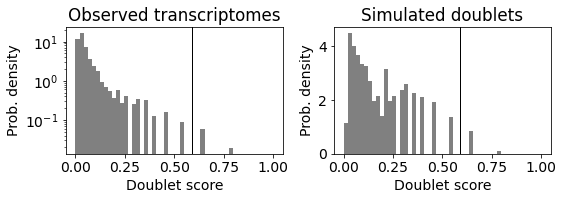

In [29]:
scrub.plot_histogram()

Running UMAP...
Done.


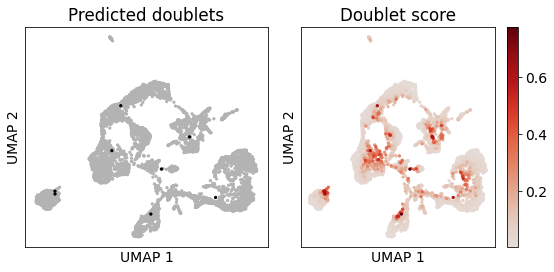

In [30]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

scrub.plot_embedding('UMAP', order_points=True);

# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);

In [32]:
a= np.array([A84C_cell_list,doublet_scores,predicted_doublets])
a = pd.DataFrame({'barcodes':a[0,:],'score':a[1,:],'prediction':a[2,:]})
a.to_csv('./res/step_1_fig_210612/A84C_scrublet_210613.txt', index=False,header=True)